Script used to create the necessary graphical and analytical tools that will allow to study the distribution of the returns obtained from the different portfolios generated.

# Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charge the dataset

In [7]:
#Toy example
dict = {"return": [0, 5, -1, 3, 0, -6, 7]}
return_df = pd.DataFrame.from_dict(dict)
return_df.head()


,return
0,0
1,5
2,-1
3,3
4,0


# Raw data histogram

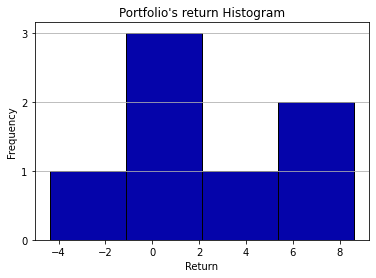

In [36]:
n, bins, patches = plt.hist(x=return_df['return'], bins='auto', color='#0504aa', align='right', edgecolor='black')
plt.grid(axis='y')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title("Portfolio's return Histogram")
maxfreq = n.max()
plt.yticks(np.arange(0, 4, 1))
plt.show()

# Kernel Density Estimate (KDE)